In [5]:
!pip install gseapy

  Using cached gseapy-1.1.8.tar.gz (112 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gseapy: filename=gseapy-1.1.8-cp312-cp312-macosx_10_12_x86_64.whl size=543249 sha256=050154bc3f9bb7e67320ee1463dc9bc18178ceb414f29bec755918d2893258d4
  Stored in directory: /Users/kpax/Library/Caches/pip/wheels/ea/e7/19/495756550b58fefcc7ef1d7fa5440bbccfe99e1777e2510e8f
Successfully built gseapy


In [26]:
import anndata as ad
ppmi_deg = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_deg_males_control_pd_baselines.h5ad")

In [27]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [28]:
deg_df = ppmi_deg.to_df()

In [29]:
symbol_ensembl_mapping = ppmi_ad.varm['symbol_ensembl_mapping']

In [36]:
deg_sign = deg_df[(deg_df['abs_log2FoldChange'] >= 0.5) & (deg_df['padj'] < 0.05)]

In [37]:
deg_sign = deg_sign.merge(symbol_ensembl_mapping[['gene_symbol']], left_index=True, right_index=True)

In [38]:
deg_sign_sorted = deg_sign.sort_values(by=['abs_log2FoldChange', 'padj'], ascending=[False, True])

In [39]:
deg_sign_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange,gene_symbol
ENSG00000277720.1,0.647137,-6.847752,1.478054,-4.632951,3.604902e-06,1.331217e-02,6.847752,H3C5P
ENSG00000274128.1,0.649044,-4.931670,1.065950,-4.626549,3.718095e-06,1.331217e-02,4.931670,ENSG00000274128
ENSG00000238145.2,0.694429,-4.698193,0.931175,-5.045448,4.524607e-07,3.171908e-03,4.698193,TUBAP8
ENSG00000273730.1,3.360346,-4.633354,0.603031,-7.683443,1.548684e-14,4.435896e-10,4.633354,LOC124908527
ENSG00000284356.1,0.475261,3.512510,0.811044,4.330851,1.485341e-05,4.727180e-02,3.512510,TAF11L10
ENSG00000279466.1,0.712112,-2.823020,0.637301,-4.429649,9.438677e-06,3.180612e-02,2.823020,ENSG00000279466
ENSG00000199964.1,0.620213,-2.742635,0.453136,-6.052567,1.425557e-09,2.722149e-05,2.742635,Y_RNA
ENSG00000223565.1,1.397391,-2.130725,0.444737,-4.790972,1.659753e-06,7.313893e-03,2.130725,ENSG00000223565
ENSG00000243366.3,55.559840,2.004203,0.342200,5.856825,4.718009e-09,6.756896e-05,2.004203,RN7SL60P
ENSG00000229807.11,87.686639,-1.761076,0.322650,-5.458161,4.810915e-08,5.511962e-04,1.761076,XIST


In [40]:
import gseapy as gp
enr = gp.enrichr(gene_list=deg_sign_sorted['gene_symbol'].tolist(),
                 gene_sets=['MSigDB_Hallmark_2020',
                            'KEGG_2021_Human',
                            'WikiPathways_2024_Human',
                            'Human_Phenotype_Ontology',
                            'GO_Biological_Process_2023',
                            'GO_Molecular_Function_2023',
                            'GO_Cellular_Component_2023',
                            'SynGO_2024',
                            'OMIM_Disease'],
                 organism='human')

/opt/anaconda3/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


In [41]:

enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Fatty Acid Metabolism,1/158,0.126185,0.126185,0,0,7.892516,16.337531,XIST
1,KEGG_2021_Human,African trypanosomiasis,1/37,0.031001,0.083353,0,0,34.630208,120.296366,HBA2
2,KEGG_2021_Human,Malaria,1/50,0.041677,0.083353,0,0,25.426020,80.799167,HBA2
3,KEGG_2021_Human,Spliceosome,1/150,0.120174,0.146921,0,0,8.319631,17.627729,RNU1-2
4,KEGG_2021_Human,RNA transport,1/186,0.146921,0.146921,0,0,6.688514,12.827632,RNU1-2
5,Human_Phenotype_Ontology,Hypochromic microcytic anemia (HP:0004840),1/8,0.006781,0.078968,0,0,178.357143,890.652175,HBA2
6,Human_Phenotype_Ontology,Spontaneous abortion (HP:0005268),1/11,0.009313,0.078968,0,0,124.831250,583.759451,XIST
7,Human_Phenotype_Ontology,Toxemia of pregnancy (HP:0100603),1/11,0.009313,0.078968,0,0,124.831250,583.759451,HBA2
8,Human_Phenotype_Ontology,Abnormal hemoglobin (HP:0011902),1/14,0.011838,0.078968,0,0,96.009615,425.939424,HBA2
9,Human_Phenotype_Ontology,Hypochromic anemia (HP:0001931),1/16,0.013519,0.078968,0,0,83.200000,358.067161,HBA2


In [15]:
deg_df_symbols = deg_df.merge(symbol_ensembl_mapping[['gene_symbol']], left_index=True, right_index=True)

In [42]:
enr_res_pivot = enr.results.pivot(index='Term', columns='Genes', values='P-value')
enr_res_pivot = enr_res_pivot.fillna(1.0)

Text(0.5, 1.0, 'GSEA Results for Males PD vs Control Baselines - All Ages')

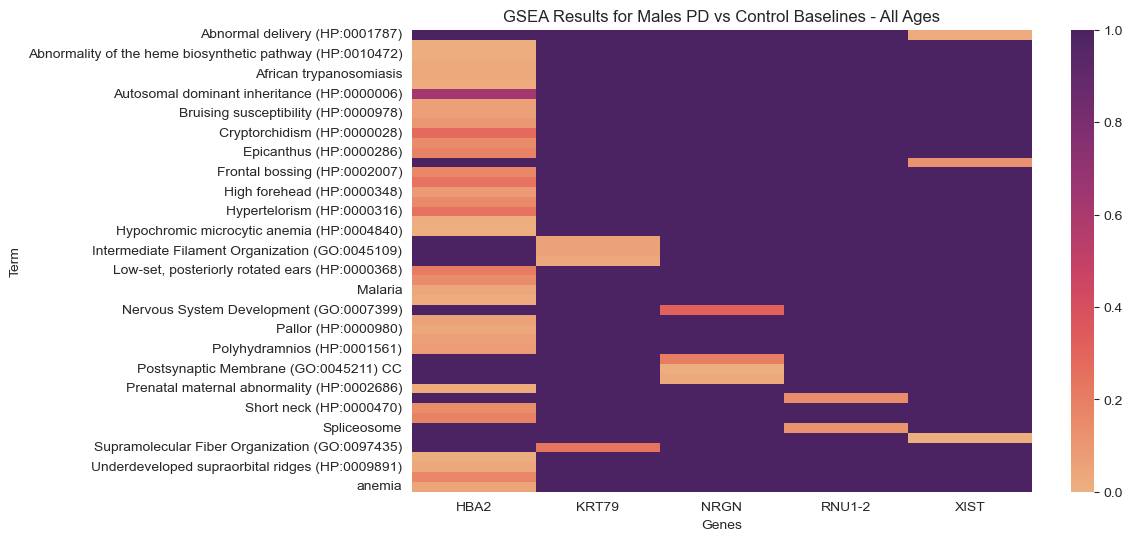

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    enr_res_pivot,
    cmap='flare',
    fmt='.3f',
    vmin=0, vmax=1
)
plt.title("GSEA Results for Males PD vs Control Baselines - All Ages")